<a href="https://colab.research.google.com/github/Asigen93/DeepLearning_Tugas4/blob/main/DeteksiObjekGorengan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependensi

In [1]:
# Install Ultralytics dan Roboflow
%pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

# Cek Konfigurasi

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


# Download Dataset Roboflow

In [3]:
from roboflow import Roboflow
import os

# Hubungkan ke akun Roboflow dan unduh dataset
rf = Roboflow(api_key="QCBJE7OWX11d9DtDoY3y")  # Ganti jika API key kamu berbeda
project = rf.workspace("tirtarcs").project("deteksiobjekgorengan")
version = project.version(7)
dataset = version.download("yolov8")

# Simpan path ke file data.yaml
dataset_path = dataset.location
data_yaml_path = os.path.join(dataset_path, "data.yaml")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DeteksiObjekGorengan-7 in yolov8:: 100%|██████████| 1212/1212 [00:00<00:00, 9279.38it/s]


In [4]:
import os
import yaml
from glob import glob

# Ganti ini ke lokasi data.yaml kamu
data_yaml_path = '/content/DeteksiObjekGorengan-7/data.yaml'

# Load YAML
with open(data_yaml_path, 'r') as f:
    data_cfg = yaml.safe_load(f)

# Paths
base_dir = os.path.dirname(data_yaml_path)
splits = ['train', 'val', 'test']
split_paths = {
    s: os.path.abspath(os.path.join(base_dir, os.path.normpath(data_cfg[s])))
    for s in splits if s in data_cfg
}

def analyze_split(name, img_dir):
    img_files = glob(os.path.join(img_dir, '*.jpg')) + glob(os.path.join(img_dir, '*.png'))

    print(f"📁 Split: {name}")
    print(f"  🖼️ Jumlah gambar: {len(img_files)}")

for split_name, path in split_paths.items():
    analyze_split(split_name, path)

📁 Split: train
  🖼️ Jumlah gambar: 390
📁 Split: val
  🖼️ Jumlah gambar: 120
📁 Split: test
  🖼️ Jumlah gambar: 90


In [5]:
!ls /content/DeteksiObjekGorengan-7/train/images
!ls /content/DeteksiObjekGorengan-7/valid/images
!ls /content/DeteksiObjekGorengan-7/test/images

2025_04_14_16_51_IMG_4302_JPG.rf.8a96262ccb05e6c4e7fbb2e02b724b93.jpg
2025_04_14_16_52_IMG_4303_JPG.rf.73d22337e5251b2750115ebfdb26a8dd.jpg
2025_04_14_16_52_IMG_4304_JPG.rf.b25199214d0a6e346cde9b0f768f2607.jpg
2025_04_14_16_52_IMG_4305_JPG.rf.2badbdce3c6c3268a3a2f67db5316e80.jpg
2025_04_14_16_53_IMG_4307_JPG.rf.601ce73606be74933352756a44759f8f.jpg
2025_04_14_16_53_IMG_4308_JPG.rf.6992a7316b981b35f791a2ff16cca4f6.jpg
2025_04_14_16_53_IMG_4310_JPG.rf.09a24ba38a33e3eedcb0a50d1ba94929.jpg
2025_04_14_16_53_IMG_4311_JPG.rf.52f2ddc0927c4ed505366b6ecb674dea.jpg
2025_04_14_16_53_IMG_4312_JPG.rf.f7af5ed1851c07ad1e3d24647c470295.jpg
2025_04_14_16_53_IMG_4314_JPG.rf.c79dba870bf6b6f5f1f668bd67e3ff1b.jpg
2025_04_14_16_54_IMG_4315_JPG.rf.6f7f59d814c9af33fe9d1efa63d13590.jpg
2025_04_14_16_54_IMG_4316_JPG.rf.358dcacdaf103c013a92f6f082ded25c.jpg
2025_04_14_16_54_IMG_4318_JPG.rf.810af301304c73f3b08f1c30c45ff921.jpg
2025_04_14_16_54_IMG_4319_JPG.rf.3117ebcb0d229277432f514aec2c57cf.jpg
2025_04_14_16_55_IMG

# Training

In [6]:
from ultralytics import YOLO

# Load arsitektur YOLOv8n dari nol (tanpa pretrained weights)
model = YOLO("yolov8n.yaml")  # ini akan membuat model baru dari konfigurasi

# Training model
model.train(
    data="DeteksiObjekGorengan-7/data.yaml",  # path ke file YAML dataset
    epochs=50,
    imgsz=256
)

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=DeteksiObjekGorengan-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 119MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 567.9±188.6 MB/s, size: 14.0 KB)


train: Scanning /content/DeteksiObjekGorengan-7/train/labels... 390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 390/390 [00:00<00:00, 1862.61it/s]

train: New cache created: /content/DeteksiObjekGorengan-7/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 307.2±74.0 MB/s, size: 13.7 KB)


val: Scanning /content/DeteksiObjekGorengan-7/valid/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<00:00, 1335.89it/s]

val: New cache created: /content/DeteksiObjekGorengan-7/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.418G       3.98      4.415      4.215         18        256: 100%|██████████| 25/25 [00:05<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        120        146   0.000278     0.0143   0.000431   6.51e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.479G      3.432      3.692      3.958         14        256: 100%|██████████| 25/25 [00:03<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all        120        146   0.000278     0.0143   0.000502   8.11e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.496G      2.942       2.84      3.397         15        256: 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        120        146   0.000321     0.0143   0.000277    3.9e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.514G      2.533      2.457      2.988         17        256: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        120        146      0.157      0.154      0.149     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.529G      2.109      2.177      2.692         12        256: 100%|██████████| 25/25 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]

                   all        120        146       0.25     0.0111     0.0977     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.547G      1.913      2.085       2.44         16        256: 100%|██████████| 25/25 [00:02<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all        120        146       0.17      0.217      0.189      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.564G      1.822      2.003      2.339         14        256: 100%|██████████| 25/25 [00:03<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        120        146      0.525      0.156      0.225      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.582G       1.65       1.92      2.164         13        256: 100%|██████████| 25/25 [00:02<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]

                   all        120        146      0.356      0.619      0.437      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.598G      1.569      1.867      2.067         21        256: 100%|██████████| 25/25 [00:03<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        120        146      0.369      0.631      0.468      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.615G      1.491      1.801      1.977         13        256: 100%|██████████| 25/25 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

                   all        120        146      0.422      0.702      0.494      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.633G      1.371       1.73       1.86         20        256: 100%|██████████| 25/25 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]

                   all        120        146      0.397      0.499      0.497      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      0.65G      1.328      1.736      1.812         18        256: 100%|██████████| 25/25 [00:02<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        120        146      0.493      0.572       0.55      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.666G      1.245      1.662       1.76         12        256: 100%|██████████| 25/25 [00:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all        120        146      0.369       0.83      0.575        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.684G      1.201      1.625      1.674         20        256: 100%|██████████| 25/25 [00:02<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        120        146        0.5      0.712      0.604      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.701G      1.179      1.631      1.638         14        256: 100%|██████████| 25/25 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]

                   all        120        146      0.405      0.756      0.583      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.717G      1.128      1.597      1.601         15        256: 100%|██████████| 25/25 [00:04<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        120        146      0.498      0.878      0.708      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.734G      1.084      1.551      1.572         22        256: 100%|██████████| 25/25 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]

                   all        120        146      0.488      0.829      0.692      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.752G      1.033      1.509      1.502         19        256: 100%|██████████| 25/25 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all        120        146      0.492      0.814      0.657      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      0.77G      1.035      1.506      1.503         15        256: 100%|██████████| 25/25 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]

                   all        120        146      0.421      0.806       0.69      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.785G     0.9931      1.479      1.469         13        256: 100%|██████████| 25/25 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        120        146      0.544       0.86      0.781      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.803G     0.9883      1.502      1.491          7        256: 100%|██████████| 25/25 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        120        146      0.603      0.793      0.779      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      0.82G     0.9952      1.446      1.461         17        256: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        120        146      0.568      0.786      0.737       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.838G     0.9245        1.4       1.41         20        256: 100%|██████████| 25/25 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all        120        146      0.536      0.689      0.718      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.855G     0.8918      1.346      1.384         18        256: 100%|██████████| 25/25 [00:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all        120        146      0.667       0.83      0.802      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.871G     0.8891      1.355      1.359         19        256: 100%|██████████| 25/25 [00:04<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all        120        146      0.666      0.837      0.846      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.889G     0.8805      1.372      1.378         21        256: 100%|██████████| 25/25 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        120        146      0.617      0.849      0.778       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.906G      0.812      1.327      1.342         10        256: 100%|██████████| 25/25 [00:03<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        120        146      0.664      0.884      0.824      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.922G     0.8403      1.308      1.333         20        256: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        120        146      0.692      0.852      0.803       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.939G     0.7843      1.227      1.288         17        256: 100%|██████████| 25/25 [00:02<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        120        146      0.728      0.862      0.866      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.957G     0.8245      1.255      1.316         12        256: 100%|██████████| 25/25 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        120        146      0.743      0.821      0.876      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.973G     0.8033      1.247      1.324         16        256: 100%|██████████| 25/25 [00:04<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all        120        146      0.555      0.906      0.833      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      0.99G     0.7832      1.178      1.273         21        256: 100%|██████████| 25/25 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all        120        146      0.791      0.836      0.911      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.01G     0.7993      1.217      1.289         15        256: 100%|██████████| 25/25 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]

                   all        120        146      0.741      0.862      0.904      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.02G     0.7782      1.172      1.275         18        256: 100%|██████████| 25/25 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        120        146      0.825      0.776      0.892      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.04G     0.7694       1.14      1.254         13        256: 100%|██████████| 25/25 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        120        146      0.786      0.889      0.914      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.06G      0.797      1.111      1.281         12        256: 100%|██████████| 25/25 [00:03<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        120        146      0.789      0.844       0.93      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.08G     0.7583      1.129      1.266         13        256: 100%|██████████| 25/25 [00:04<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        120        146      0.919       0.86      0.965      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.09G     0.6921      1.079      1.204         18        256: 100%|██████████| 25/25 [00:03<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        120        146      0.755      0.795      0.881      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.11G     0.7028      1.049       1.21          8        256: 100%|██████████| 25/25 [00:02<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all        120        146       0.91      0.885      0.961      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.13G     0.7188      1.093      1.242         11        256: 100%|██████████| 25/25 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        120        146      0.838      0.797      0.889      0.804


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.14G     0.6299      1.024       1.23          6        256: 100%|██████████| 25/25 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all        120        146      0.682      0.891       0.84       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.16G     0.6359     0.9589      1.266          6        256: 100%|██████████| 25/25 [00:02<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        120        146      0.829      0.904      0.936      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.18G     0.5969     0.9492      1.222          7        256: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        120        146      0.855       0.94      0.942      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.19G     0.5892      0.865      1.194          6        256: 100%|██████████| 25/25 [00:02<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all        120        146      0.923      0.947      0.976       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.21G     0.5468     0.8332      1.156          7        256: 100%|██████████| 25/25 [00:02<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        120        146      0.898      0.948      0.968      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.23G      0.544     0.8423      1.188          8        256: 100%|██████████| 25/25 [00:02<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        120        146      0.888      0.959       0.97      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.24G     0.5165      0.784      1.148          8        256: 100%|██████████| 25/25 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all        120        146      0.939      0.946      0.983      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.26G     0.5018     0.7769       1.15          6        256: 100%|██████████| 25/25 [00:02<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all        120        146       0.91      0.915      0.958       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.28G     0.5088     0.7406      1.126         10        256: 100%|██████████| 25/25 [00:02<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all        120        146      0.899      0.915      0.952      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.29G     0.4846     0.7288      1.135          6        256: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all        120        146      0.908      0.938      0.961      0.902



50 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]


                   all        120        146      0.939      0.946      0.983      0.908
                Bakwan         26         35      0.953      0.971      0.991      0.964
                Lumpia         28         33      0.929       0.97      0.989      0.819
                  Tahu         37         43      0.942       0.93      0.982       0.92
                 Tempe         29         35      0.933      0.914      0.969      0.926
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780ce13af8d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

# Validasi Model Hasil Training

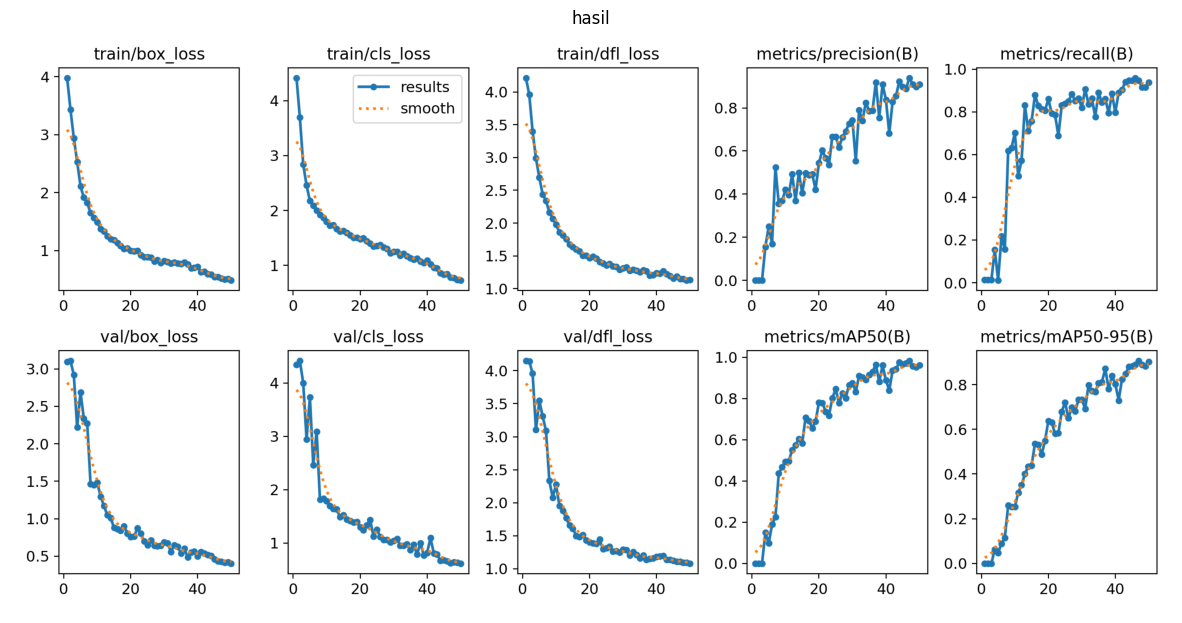

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path file gambar confusion matrix
image_path = '/content/runs/detect/train/results.png'

# Membaca gambar
img = mpimg.imread(image_path)

# Menampilkan gambar
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')  # matikan axis supaya lebih bersih
plt.title('hasil')
plt.show()


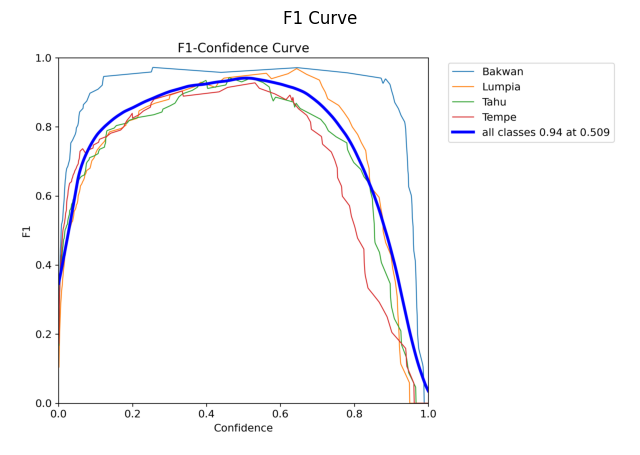

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke file gambar F1 Curve
image_path = '/content/runs/detect/train/F1_curve.png'

# Membaca gambar
img = mpimg.imread(image_path)

# Menampilkan gambar
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Sembunyikan sumbu
plt.title('F1 Curve')
plt.show()

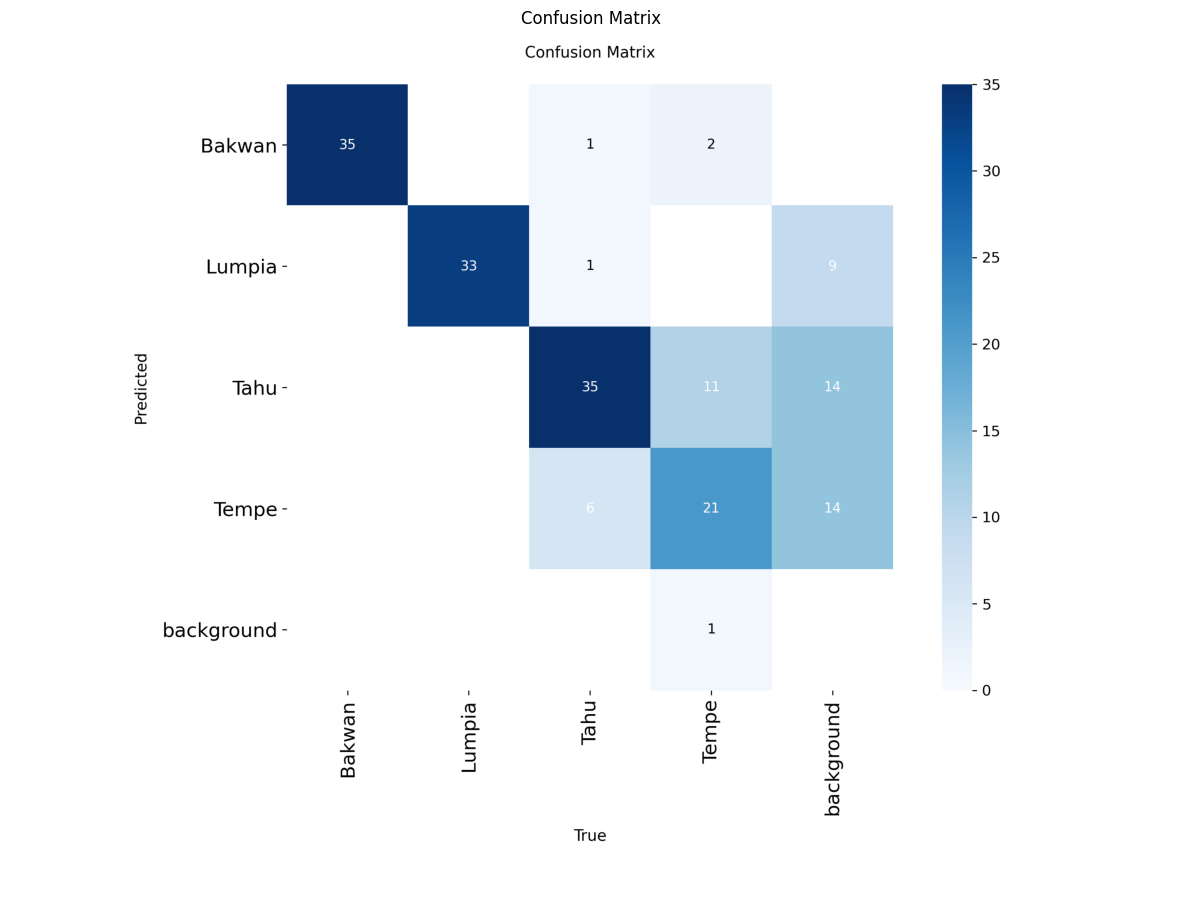

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke gambar confusion matrix
image_path = '/content/runs/detect/train/confusion_matrix.png'

# Membaca gambar
img = mpimg.imread(image_path)

# Menampilkan gambar
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')  # Sembunyikan sumbu
plt.title('Confusion Matrix')
plt.show()

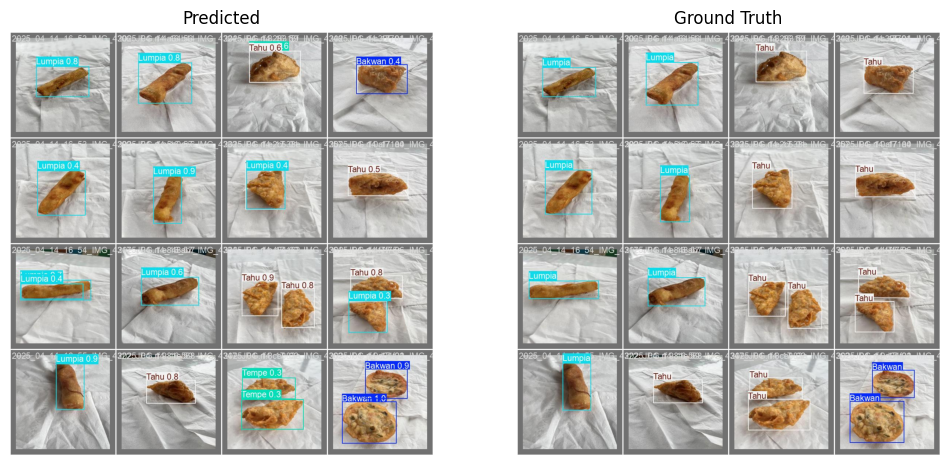

In [10]:
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg # This import is not needed for this specific cell
from PIL import Image # Import the Image object from Pillow

# Path file gambar confusion matrix - these paths seem to be for a previous run (train5).
# If you ran training again, the output might be in 'train', 'train1', 'train2', etc.
# Please verify the correct path based on your training run.
pred_image_path = "/content/runs/detect/train/val_batch0_pred.jpg"
labels_image_path = "/content/runs/detect/train/val_batch0_labels.jpg"

# Open the images using PIL's Image.open
try:
    pred = Image.open(pred_image_path)
    labels = Image.open(labels_image_path)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(pred)
    plt.axis('off')
    plt.title("Predicted")

    plt.subplot(1, 2, 2)
    plt.imshow(labels)
    plt.axis('off')
    plt.title("Ground Truth")

    plt.show()

except FileNotFoundError:
    print(f"Error: One of the image files was not found.")
    print(f"Please check if the paths '{pred_image_path}' and '{labels_image_path}' are correct.")
    print("Output directories are typically in 'runs/detect/' and named 'train', 'train1', 'train2', etc.")
    print("Check the directory created by your latest training run.")

In [2]:
!ffmpeg -i "/content/drive/MyDrive/DataBaruDeepLearning/baru/video.mp4" -vf scale=640:360 "/content/video.mp4"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [3]:
from ultralytics import YOLO

# Muat model
model = YOLO('runs/detect/train/weights/best.pt')

# Jalankan prediksi pada video resolusi rendah
results_vid = model.predict(
    source="/content/video.mp4",
    save=True,
    verbose=True,
    project="/content",
    name="hasilprediksi_video",
    exist_ok=True
)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1164) /content/video.mp4: 160x256 2 Bakwans, 1 Tahu, 32.8ms
video 1/1 (frame 2/1164) /content/video.mp4: 160x256 1 Bakwan, 2 Tahus, 13.4ms
video 1/1 (frame 3/1164) /content/video.mp4: 160x256 1 Bakwan, 2 Tahus, 6.1ms
video 1/1 (frame 4/1164) /content/video.mp4: 160x256 3 Bakwans, 2 Tahus, 6.1ms
video 1/1 (frame 5/1164) /content/video.mp4: 160x256 3 Bakwans, 2 Tahus, 6.3ms
video 1/1 (frame 6/1164) /content/video.mp4: 160x256 2 Bakwans

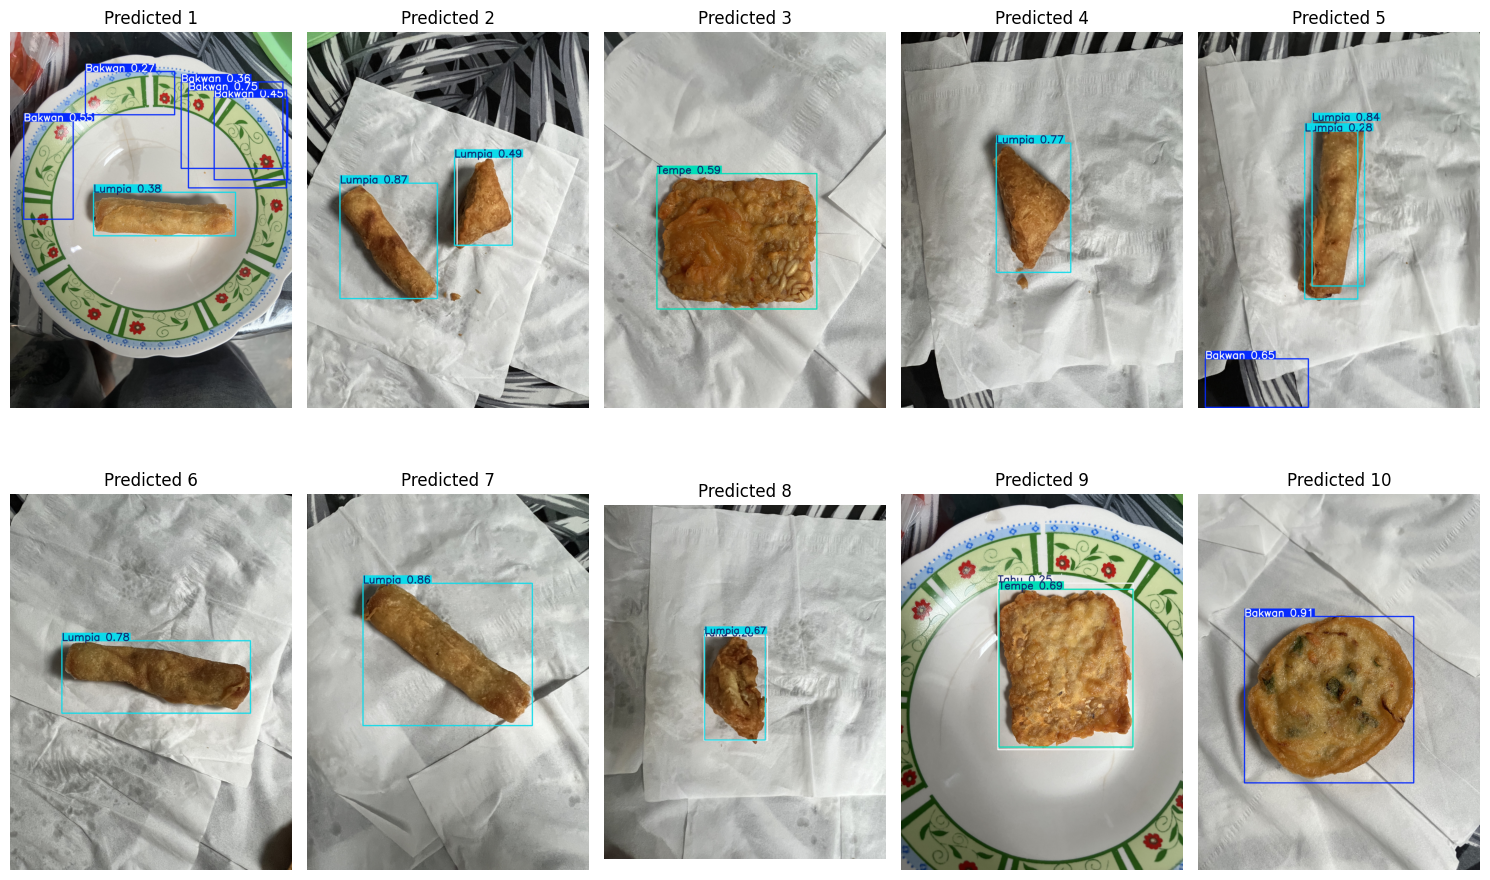

In [14]:
import glob
import matplotlib.pyplot as plt # Import matplotlib.pyplot
from PIL import Image           # Import Image from PIL

predicted_images = glob.glob("runs/detect/predict/*.jpg")

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(predicted_images[:10]):
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted {i+1}")
plt.tight_layout()
plt.show()

In [11]:
# 3. Konversi video hasil prediksi dari .avi ke .mp4
import os

input_video = "/content/hasilprediksi_video/video.avi"
output_video = "/content/hasilprediksi_video/video.mp4"

# Konversi dengan ffmpeg
!ffmpeg -y -i "{input_video}" -vcodec libx264 -acodec aac "{output_video}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [12]:
# 4. Tampilkan video mp4 di dalam notebook
from IPython.display import HTML
from base64 import b64encode

with open(output_video, 'rb') as f:
    mp4 = f.read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=640 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")